# Final PJT - Preprocessing 2

이해원

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [17]:
customer = pd.read_csv('customer.csv') # 차주정보
rlps = pd.read_csv('rlps.csv') # 보험계약관계자정보

In [18]:
display(customer.head())
display(customer.info())

display(rlps.head())
display(rlps.info())

,JOIN_SN,GENDER,AGE,AGE_GROUP
0,787068,2,36,3
1,1630591,2,10,0
2,746631,1,35,3
3,936890,1,10,0
4,1850766,1,61,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48285 entries, 0 to 48284
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   JOIN_SN    48285 non-null  int64
 1   GENDER     48285 non-null  int64
 2   AGE        48285 non-null  int64
 3   AGE_GROUP  48285 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


None

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x
0,8,795034,I,1,0
1,8,3700186,I,1,0
2,8,6394418,I,99,2
3,8,6614027,I,1,0
4,8,7083655,I,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193880 entries, 0 to 193879
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JOIN_SN         193880 non-null  int64 
 1   POL_SN          193880 non-null  int64 
 2   CT_RLPS_GBN_CD  193880 non-null  object
 3   CT_IN_RLTN_CD   193880 non-null  int64 
 4   rltn_cd_x       193880 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.4+ MB


None

In [19]:
merged_df = pd.merge(rlps, customer, on=['JOIN_SN'], how='left', indicator=True)
display(merged_df.info())
display(merged_df.head())
display(merged_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193880 entries, 0 to 193879
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   JOIN_SN         193880 non-null  int64   
 1   POL_SN          193880 non-null  int64   
 2   CT_RLPS_GBN_CD  193880 non-null  object  
 3   CT_IN_RLTN_CD   193880 non-null  int64   
 4   rltn_cd_x       193880 non-null  int64   
 5   GENDER          193880 non-null  int64   
 6   AGE             193880 non-null  int64   
 7   AGE_GROUP       193880 non-null  int64   
 8   _merge          193880 non-null  category
dtypes: category(1), int64(7), object(1)
memory usage: 12.0+ MB


None

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x,GENDER,AGE,AGE_GROUP,_merge
0,8,795034,I,1,0,1,26,2,both
1,8,3700186,I,1,0,1,26,2,both
2,8,6394418,I,99,2,1,26,2,both
3,8,6614027,I,1,0,1,26,2,both
4,8,7083655,I,1,0,1,26,2,both


,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd_x,GENDER,AGE,AGE_GROUP,_merge
count,1.938800e+05,1.938800e+05,193880,193880.000000,193880.000000,193880.000000,193880.000000,193880.000000,193880
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,both
freq,NaN,NaN,134157,NaN,NaN,NaN,NaN,NaN,193880
mean,9.842157e+05,4.999371e+06,NaN,43.486548,0.814891,1.505668,42.552110,3.777058,NaN
std,5.661964e+05,2.891093e+06,NaN,48.565287,0.955802,0.499969,20.006608,2.071895,NaN
min,8.000000e+00,3.700000e+01,NaN,1.000000,0.000000,1.000000,10.000000,0.000000,NaN
25%,4.907670e+05,2.482384e+06,NaN,1.000000,0.000000,1.000000,26.000000,2.000000,NaN
50%,9.832650e+05,5.001054e+06,NaN,1.000000,0.000000,2.000000,42.000000,4.000000,NaN
75%,1.477993e+06,7.511981e+06,NaN,99.000000,2.000000,2.000000,58.000000,5.000000,NaN


## 정리

1. rlps에 customer를 left join했다.
    - rlps에는 증권번호가 추가되어, 같은 차주번호에 여러개의 증권번호가 있기 때문에

2. [★논의사항] customer의 고객 정보(나이, 연령대, 성별)은 아마 해당 계약을 한 계약자의 정보일 것 같은데, left join을 하면 I(피보험자)인 경우에도 다 join이 됨.
    - CT_RLPS_GBN_CD가 C(계약자)인 로우에만 join 가능한가? 

3. 아래에 시각화, 상관관계 돌린 결과를 첨부함. 하지만 이건 참고할만하지 못한 듯함.
    - rlps에서 [같은 고객번호 - 다른 증권번호]일지라도, customer에서 [고객번호]에 해당되는 걸 다 left join했기 때문,,

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

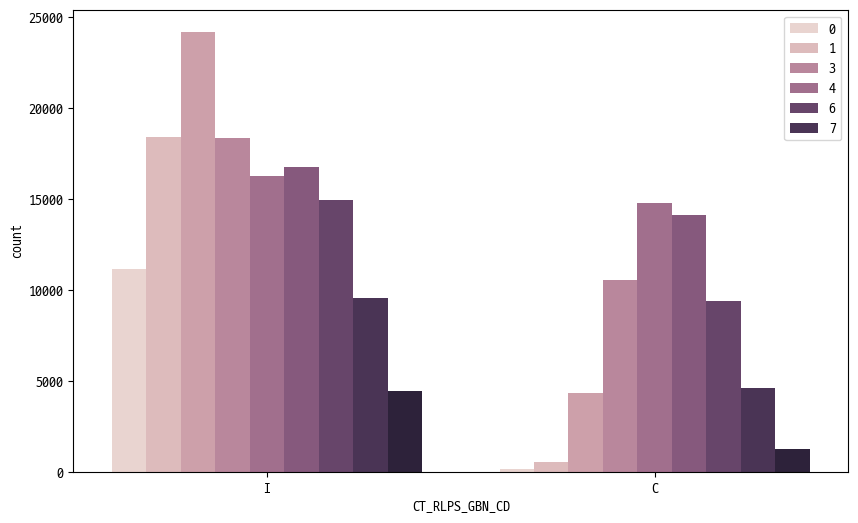

I
AGE_GROUP
2    24216
1    18395
3    18352
5    16759
4    16284
6    14962
0    11183
7     9584
8     4422
Name: count, dtype: int64

C
AGE_GROUP
4    14765
5    14123
3    10525
6     9423
7     4590
2     4325
8     1265
1      558
0      149
Name: count, dtype: int64



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

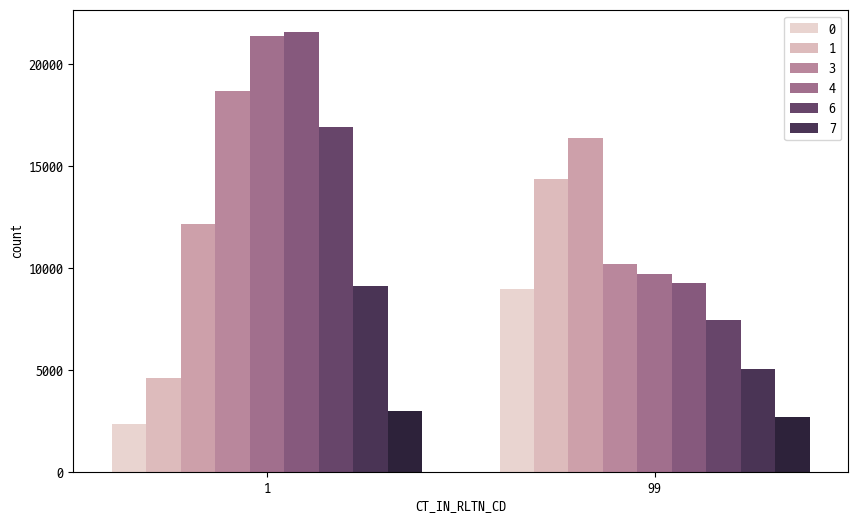

1
AGE_GROUP
5    21597
4    21366
3    18703
6    16930
2    12163
7     9125
1     4599
8     3003
0     2340
Name: count, dtype: int64

99
AGE_GROUP
2    16378
1    14354
3    10174
4     9683
5     9285
0     8992
6     7455
7     5049
8     2684
Name: count, dtype: int64



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

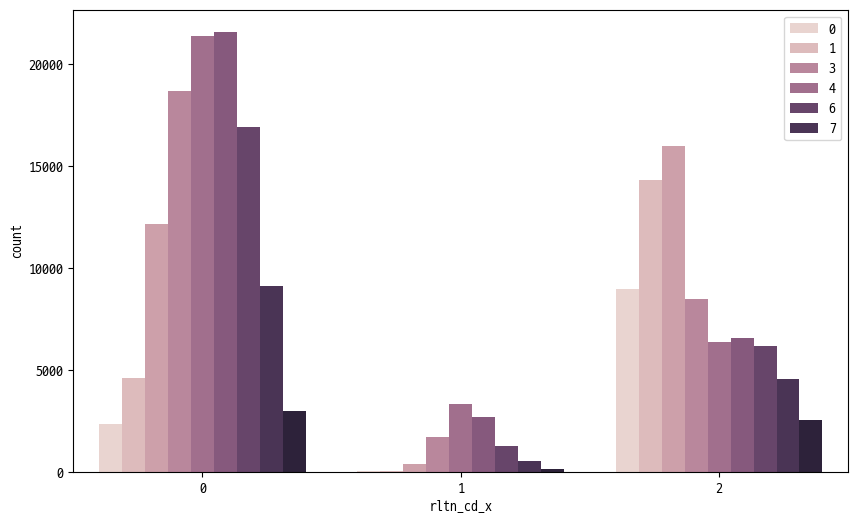

0
AGE_GROUP
5    21597
4    21366
3    18703
6    16930
2    12163
7     9125
1     4599
8     3003
0     2340
Name: count, dtype: int64

2
AGE_GROUP
2    15988
1    14295
0     8977
3     8480
5     6579
4     6364
6     6192
7     4527
8     2535
Name: count, dtype: int64

1
AGE_GROUP
4    3319
5    2706
3    1694
6    1263
7     522
2     390
8     149
1      59
0      15
Name: count, dtype: int64



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

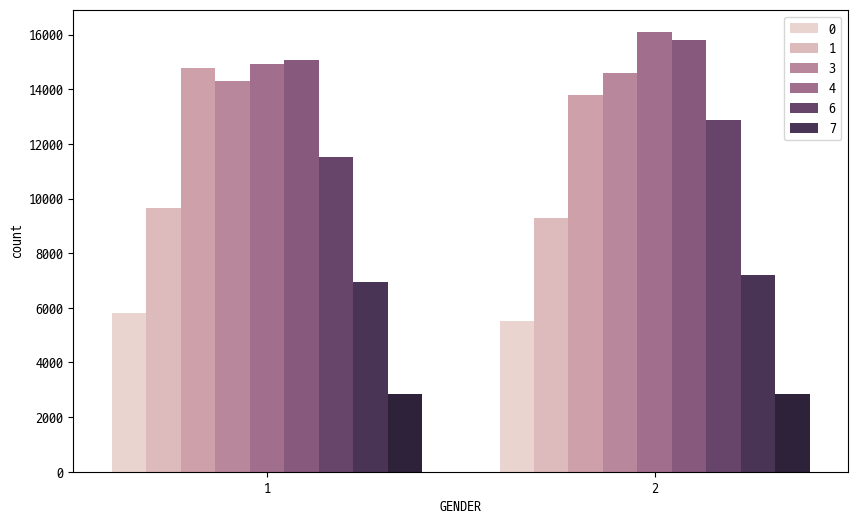

1
AGE_GROUP
5    15082
4    14942
2    14761
3    14286
6    11507
1     9649
7     6955
0     5812
8     2847
Name: count, dtype: int64

2
AGE_GROUP
4    16107
5    15800
3    14591
2    13780
6    12878
1     9304
7     7219
0     5520
8     2840
Name: count, dtype: int64



C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

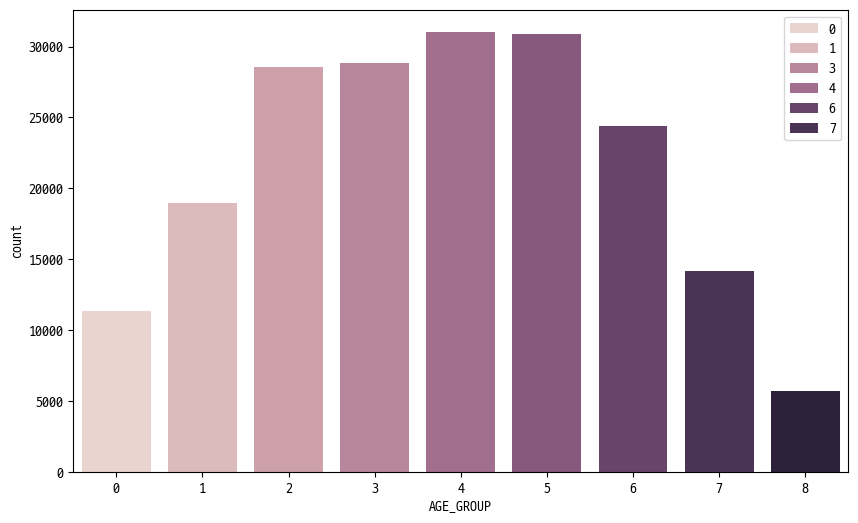

2
AGE_GROUP
2    28541
Name: count, dtype: int64

3
AGE_GROUP
3    28877
Name: count, dtype: int64

6
AGE_GROUP
6    24385
Name: count, dtype: int64

5
AGE_GROUP
5    30882
Name: count, dtype: int64

8
AGE_GROUP
8    5687
Name: count, dtype: int64

4
AGE_GROUP
4    31049
Name: count, dtype: int64

1
AGE_GROUP
1    18953
Name: count, dtype: int64

0
AGE_GROUP
0    11332
Name: count, dtype: int64

7
AGE_GROUP
7    14174
Name: count, dtype: int64



In [22]:
# 시각화
# JOIN_SN	POL_SN	CT_RLPS_GBN_CD	CT_IN_RLTN_CD	rltn_cd_x	GENDER	AGE	AGE_GROUP	_merge

vis_list = ['CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'rltn_cd_x','GENDER', 'AGE_GROUP']

def ctgr_value_counts(iumn_name):
    for uniq in list(merged_df[iumn_name].unique()):
        cond_unique = (merged_df[iumn_name]==uniq)
        print(uniq)
        print(merged_df.loc[cond_unique]['AGE_GROUP'].value_counts())
        print()

for i in vis_list:
    plt.figure(figsize=(10,6))
    sns.countplot(data=merged_df, x=i, hue='AGE_GROUP', hue_order=(0, 1, 2, 3, 4, 5, 6, 7, 8))     
    plt.legend(loc='best')
    plt.show()
    ctgr_value_counts(iumn_name=i)

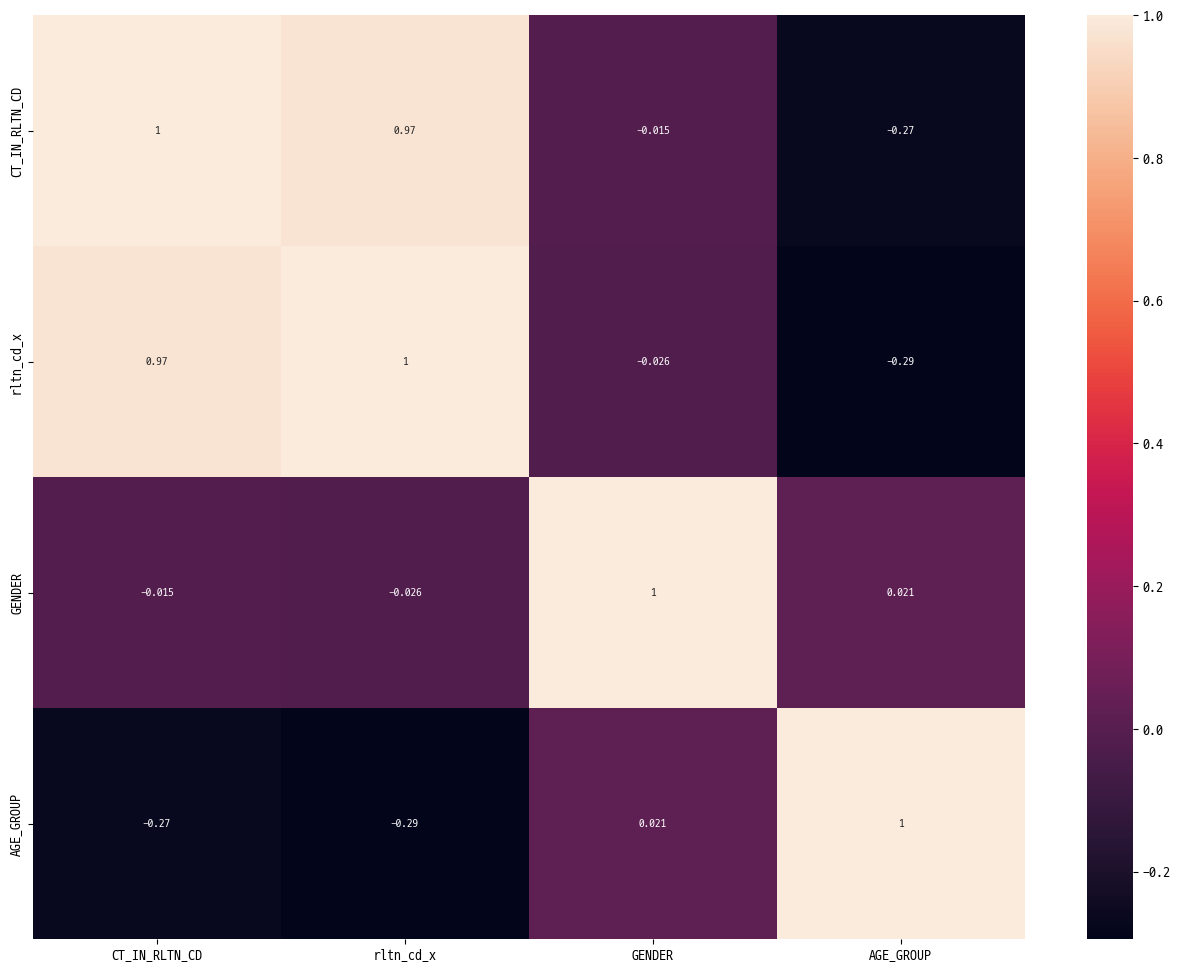

In [23]:
# 상관관계
# JOIN_SN	POL_SN	CT_RLPS_GBN_CD	CT_IN_RLTN_CD	rltn_cd_x	GENDER	AGE	AGE_GROUP	_merge

corr_df = merged_df[['CT_IN_RLTN_CD', 'rltn_cd_x', 'GENDER', 'AGE_GROUP']]

plt.rcParams["figure.figsize"] = (16, 12)
sns.heatmap(corr_df.corr(), annot = True, annot_kws={"size":8})
plt.show()